# Delta hedging black and scholes from scratch 

## BS simulation

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [2]:
def simulate_black_scholes_path(S0, r, sigma, T, steps):
    """
    Simulate one path of a stock price under Black–Scholes dynamics:
    dS(t) = r*S(t)*dt + sigma*S(t)*dW(t)
    
    Parameters:
        S0    : initial stock price
        r     : risk-free interest rate
        sigma : volatility
        T     : total time horizon (in years)
        steps : number of time steps
    
    Returns:
        A NumPy array of simulated stock prices from t=0 to t=T.
    """
    dt = T / steps
    prices = np.zeros(steps + 1)
    prices[0] = S0

    for i in range(steps):
        # Draw a random sample from a standard normal distribution
        Z = np.random.normal()
        # Update price using the geometric Brownian motion formula
        prices[i + 1] = prices[i] * np.exp((r - 0.5 * sigma**2) * dt 
                                           + sigma * np.sqrt(dt) * Z)

    return prices

def delta_black_scholes(S, r, sigma, T, steps,K):
    time_to_maturity = np.linspace(0,T,steps)[::-1]
    d1 = [(np.log(S[i]/K) + (r +(1/2) * sigma**2*time_to_maturity[i]))/(sigma*np.sqrt(time_to_maturity[i])) for i in range(steps)]
    delta = [norm.cdf(x) for x in d1]
    return delta


In [3]:

S0 = 100.0       # initial stock price
r = 0.05         # risk-free rate (5% annual)
sigma = 0.2      # volatility (20% annual)
T = 1.0          # 1 year
steps = 252      # daily steps (approximately trading days in a year)
strike= 100.0

-102.03003925099192


/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_79566/3798867626.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = [(np.log(S[i]/K) + (r +(1/2) * sigma**2*time_to_maturity[i]))/(sigma*np.sqrt(time_to_maturity[i])) for i in range(steps)]


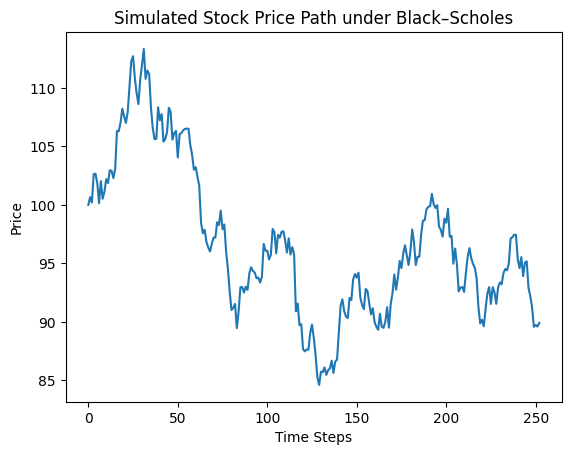

In [4]:

simulated_path = simulate_black_scholes_path(S0, r, sigma, T, steps)
delta = delta_black_scholes(simulated_path,r,sigma,T,steps,strike)
PnL = 0
position = delta[0]
Current_stock_price = S0
cash_flow =position *Current_stock_price
for i in range(1,steps):
    delta_hedge = delta[i] -position 
    if i==steps:
        cash_flow += -np.max(simulated_path[i] -strike)+ delta_hedge *Current_stock_price
    else:
        cash_flow +=delta_hedge *Current_stock_price
    position = delta[i]
    Current_stock_price = simulated_path[i]
print(cash_flow-100)
# Plot the path
plt.plot(simulated_path)
plt.title("Simulated Stock Price Path under Black–Scholes")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.show()


In [5]:
PnL = 0
position = 0
Current_stock_price = S0
cash_flow =0
for i in range(steps):
    price_moove = Current_stock_price - simulated_path[i+1]
    delta_hedge = delta[i] -position
    if i==steps-1:
        cash_flow += -np.max(simulated_path[i+1] -strike)+ delta_hedge *Current_stock_price
    else:
        cash_flow += price_moove *position + delta_hedge *Current_stock_price
    position = delta[i]
    Current_stock_price = simulated_path[i+1]
cash_flow


np.float64(32.15661512293076)

In [7]:
cash_flow

np.float64(32.15661512293076)

In [9]:
import numpy as np
from math import log, sqrt, exp
from scipy.stats import norm

def bs_call_price(S, K, r, sigma, t, T):
    """
    Black–Scholes formula for a European call option.
    S: current underlying price
    K: strike
    r: risk-free rate
    sigma: volatility
    t: current time
    T: maturity time
    """
    tau = T - t  # time to maturity
    if tau <= 0:
        return max(S - K, 0)  # option payoff at/after maturity
    
    d1 = (log(S/K) + (r + 0.5*sigma**2)*tau) / (sigma*sqrt(tau))
    d2 = d1 - sigma*sqrt(tau)
    
    call = S*norm.cdf(d1) - K*exp(-r*tau)*norm.cdf(d2)
    return call

def bs_call_delta(S, K, r, sigma, t, T):
    """
    Delta for a European call option (partial derivative of price wrt S).
    """
    tau = T - t
    if tau <= 0:
        # After maturity, delta is 0 if the option expires worthless,
        # or 1 if the call expires in the money (S > K).
        return 1.0 if S > K else 0.0
    
    d1 = (log(S/K) + (r + 0.5*sigma**2)*tau) / (sigma*sqrt(tau))
    return norm.cdf(d1)


In [21]:

# ------------------------------
# Parameters for the simulation
# ------------------------------
S0 = 100.0      # initial underlying price
K  = 100.0      # strike
r  = 0.02       # annual risk-free rate
sigma = 0.20    # volatility (20%)
T  = 1.0        # maturity in years (1 year)
steps = 100      # number of discrete hedging steps
dt = T / steps  # length of each time step


In [26]:
simulated_path = simulate_black_scholes_path(S0, r, sigma, T, steps)
Simulations = np.zeros((1000,steps))
for i in range(1000):
    Simulations[:,i:i+1] = simulate_black_scholes_path(S0, r, sigma, T, steps)

ValueError: could not broadcast input array from shape (101,) into shape (1000,1)

In [ ]:

# We'll simulate ONE price path for demonstration. 
# In practice, you'd simulate many paths or use live market data.
 # for reproducibility

# ----------------------
# Simulate price path
# ----------------------
times = np.linspace(0, T, steps+1)
S = np.zeros(steps+1)
S[0] = S0
PnLS=[]
for j in range(1000):

    for i in range(steps):
        # Under risk-neutral dynamics (for simulation):
        # dS = r*S dt + sigma*S dW
        # We'll do a simple Euler discretization:
        Z = np.random.normal(0, 1)
        S[i+1] = S[i] * exp((r - 0.5*sigma**2)*dt + sigma*sqrt(dt)*Z)

    # ----------------------
    # Delta-hedging
    # ----------------------
    # We SELL 1 call option at t=0, so we get its premium initially.
    premium = bs_call_price(S0, K, r, sigma, 0.0, T)

    # Our hedge: we hold Delta shares of the underlying (continuously updated).
    # Start: compute initial delta at t=0
    delta_old = bs_call_delta(S0, K, r, sigma, 0.0, T)

    # We'll track the value of our hedging portfolio:
    #   - "option value" is negative (we sold the call).
    #   - "stock holding" is delta shares.
    #   - "cash" starts with the option premium minus the cost to buy delta shares.
    portfolio_value = premium - delta_old*S0

    # To keep track of PnL, note that at each step we:
    #  - Revalue the option
    #  - Rebalance the hedge (update delta)
    #  - Gains/losses go into portfolio_value
    for i in range(1, steps+1):
        t = times[i]
        
        # New delta
        delta_new = bs_call_delta(S[i], K, r, sigma, t, T)
        
        # Rebalance cost: We go from delta_old shares to delta_new shares.
        # The price of the shares is S[i]. 
        # So the immediate cashflow from rebalancing is: (delta_old - delta_new)*S[i]
        # (If delta_new > delta_old, we are buying shares, so we spend money (negative).)
        rebalance_cashflow = (delta_old - delta_new)*S[i]
        
        # Update portfolio value by that cashflow
        portfolio_value += rebalance_cashflow
        
        # Move forward in time: accrue risk-free interest over dt
        # (Very rough discrete approximation: portfolio_value *= exp(r*dt))
        # We'll do that only if we want to incorporate interest on any cash part:
        portfolio_value *= exp(r*dt)
        
        # Update old delta
        delta_old = delta_new

    # ---------------------------
    # Final payout of the option
    # ---------------------------
    # At maturity, the call option we sold costs us: payoff = max(S(T) - K, 0).
    final_option_payoff = max(S[-1] - K, 0)

    # The final stock holding is delta_old shares worth delta_old * S[-1].
    # We can liquidate them at maturity. So the final net in the portfolio is:
    final_portfolio_value = portfolio_value + delta_old * S[-1] - final_option_payoff
    PnLS.append(final_portfolio_value)
    # -----------------------
    # Print results
    # -----------------------
    """ print("Underlying final price:  {:.2f}".format(S[-1]))
    print("Option payoff at T:      {:.2f}".format(final_option_payoff))
    print("Final portfolio value:   {:.2f}".format(final_portfolio_value))"""

    # A positive final_portfolio_value implies a profit from the hedged position
    # (selling the call and hedging). In an ideal frictionless world,
    # you'd expect an outcome close to a "risk-free rate" return on the initial capital.


(array([  5.,  11.,  19.,  69., 167., 283., 266., 117.,  45.,  18.]),
 array([-3.64712154, -3.01837364, -2.38962575, -1.76087785, -1.13212996,
        -0.50338207,  0.12536583,  0.75411372,  1.38286162,  2.01160951,
         2.64035741]),
 <BarContainer object of 10 artists>)

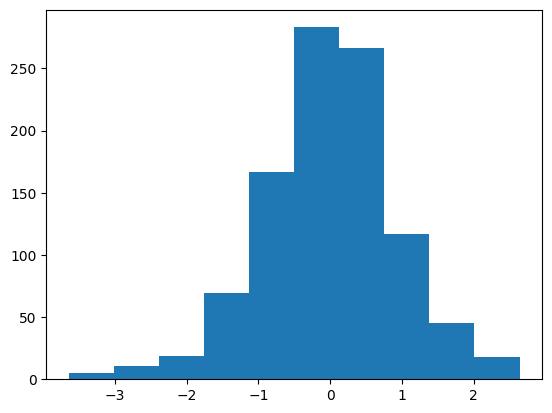

In [19]:
plt.hist(PnLS,bins = 50)